In [3]:
import pyautogui
import os
import time

from selenium import webdriver
from selenium.webdriver.chrome.options import Options

In [4]:
pyautogui.size()



Size(width=1440, height=900)

In [12]:
pyautogui.position()

Point(x=914, y=412)

In [15]:
pyautogui.locateOnScreen('pic/fill_in_code.png')

Box(left=376, top=862, width=176, height=46)

In [6]:

opts = Options()
opts.add_argument("--incognito")
# proxy = "socks5://localhost:9050"
# opts.add_argument('--proxy-server={}'.format(proxy))
ua = "Mozilla/5.0 (Windows NT 10.0; WOW64; rv:53.0) Gecko/20100101 Firefox/53.0"
opts.add_argument("user-agent={}".format(ua))
driver = webdriver.Chrome(os.path.abspath(os.path.dirname(__file__)) + '/chromedriver', chrome_options=opts)
url = "https://bsr.twse.com.tw/bshtm/"
# url = "https://www.google.com"
driver.get(url)
driver.refresh()

NameError: name '__file__' is not defined

In [18]:
import pytesseract
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

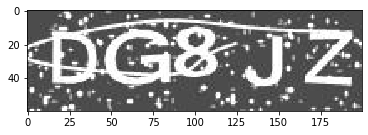

In [53]:
target = cv2.imread('/Users/yushi.chen/Downloads/CaptchaImage.jpeg')
plt.imshow(target)

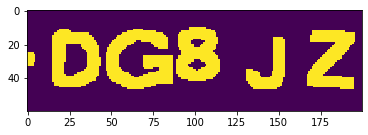

In [55]:
target = cv2.imread('/Users/yushi.chen/Downloads/CaptchaImage.jpeg')
kernel = np.ones((4,4), np.uint8)
erosion = cv2.erode(target, kernel, iterations= 1)
blurred = cv2.GaussianBlur(erosion, (5, 5), 0)
edged = cv2.Canny(blurred, 30, 150)
dilation = cv2.dilate(edged, kernel, iterations=1)
plt.imshow(dilation)

In [56]:
result = pytesseract.image_to_string(dilation, lang='eng')
print(result.replace(' ', ''))

‘DG8JZ


In [23]:
captcha = Image.open('/Users/yushi.chen/Downloads/CaptchaImage.jpeg')
data = captcha.getdata()
w,h = captcha.size
count = 0
for x in range(1,h-1):
    for y in range(1, h - 1):
        # 找出各个像素方向
        mid_pixel = data[w * y + x]
        if mid_pixel == 0:
            top_pixel = data[w * (y - 1) + x]
            left_pixel = data[w * y + (x - 1)]
            down_pixel = data[w * (y + 1) + x]
            right_pixel = data[w * y + (x + 1)]
            if top_pixel == 0:
                count += 1
            if left_pixel == 0:
                count += 1
            if down_pixel == 0:
                count += 1
            if right_pixel == 0:
                count += 1
            if count > 4:
                captcha.putpixel((x, y), 0)
result = pytesseract.image_to_string(captcha)
result

(200, 60)


''

In [52]:
if pyautogui.locateOnScreen('error_pic.png'):
    print('error')

In [1]:
import requests
from bs4 import BeautifulSoup
url = 'https://www.tej.com.tw/webtej/doc/uid.htm'
a = requests.get(url)

In [2]:
soup = BeautifulSoup(a.text)


In [3]:
table = soup.find_all('table')[1]

In [14]:
get_all = table.find_all(class_='xl24')
print(get_all[0])

<td class="xl24" height="22" style="height: 16.5pt; width: 127pt; border: 2 groove #C0C0C0" width="169"><!--mstheme--><font face="·s²Ó©úÅé">1101<span style="mso-spacerun: yes">   
            </span>¥xªd<!--mstheme--></font></td>


In [17]:
import re



In [23]:
re.findall('>(\d+)<span', str(get_all[0]))


AttributeError: module 're' has no attribute 'find'

In [21]:
str(get_all[0])

'<td class="xl24" height="22" style="height: 16.5pt; width: 127pt; border: 2 groove #C0C0C0" width="169"><!--mstheme--><font face="·s²Ó©úÅé">1101<span style="mso-spacerun: yes">\xa0\xa0 \r\n            </span>¥xªd<!--mstheme--></font></td>'